In [1]:
import pandas as pd
import numpy as np

np.random.seed(5)

In [2]:
isic_train_dataset = pd.read_csv("./datasets/ISIC_2019_Training_GroundTruth.csv")

In [3]:
isic_train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   25331 non-null  object 
 1   MEL     25331 non-null  float64
 2   NV      25331 non-null  float64
 3   BCC     25331 non-null  float64
 4   AK      25331 non-null  float64
 5   BKL     25331 non-null  float64
 6   DF      25331 non-null  float64
 7   VASC    25331 non-null  float64
 8   SCC     25331 non-null  float64
 9   UNK     25331 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.9+ MB


In [4]:
isic_train_dataset.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
bins = isic_train_dataset.iloc[:, 1:].sum(axis=0)
bins

MEL      4522.0
NV      12875.0
BCC      3323.0
AK        867.0
BKL      2624.0
DF        239.0
VASC      253.0
SCC       628.0
UNK         0.0
dtype: float64

In [6]:
import matplotlib.pyplot as plt

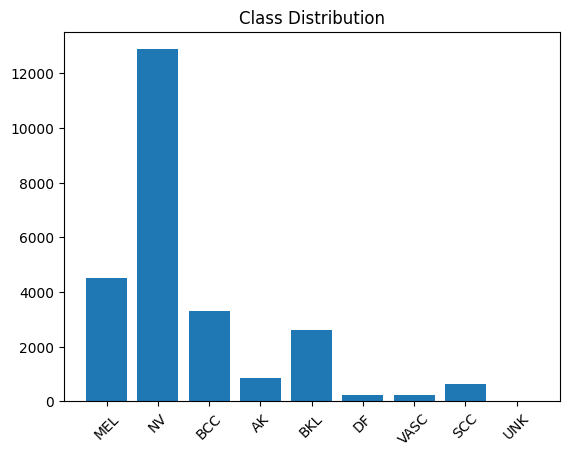

In [7]:
plt.bar(bins.index, bins.values)
plt.xticks(rotation=45)
plt.title("Class Distribution")
plt.show()

In [8]:
from PIL import Image

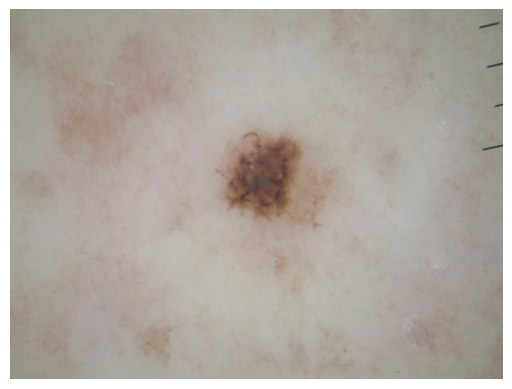

In [9]:
image = isic_train_dataset.iloc[np.random.randint(0, 1000), 0]
img = Image.open(f"./datasets/ISIC_2019_Training_Input/{image}.jpg")

plt.axis('off')
plt.imshow(img)
plt.show()

In [10]:
isic_train_dataset["label"] = isic_train_dataset.iloc[:, 1:].idxmax(axis=1)
isic_train_dataset.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,label
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL


In [11]:
grouped_by_label = isic_train_dataset.groupby("label")
random_imgs = []
for name, group in grouped_by_label:
    idx = np.random.randint(0, len(group))
    random_imgs.append(group.loc[group.index[idx], ['image', 'label']])

random_imgs

[image    ISIC_0055844
 label              AK
 Name: 14390, dtype: object,
 image    ISIC_0062052
 label             BCC
 Name: 18273, dtype: object,
 image    ISIC_0033761
 label             BKL
 Name: 12358, dtype: object,
 image    ISIC_0030665
 label              DF
 Name: 9262, dtype: object,
 image    ISIC_0029893
 label             MEL
 Name: 8490, dtype: object,
 image    ISIC_0010257
 label              NV
 Name: 917, dtype: object,
 image    ISIC_0063144
 label             SCC
 Name: 18957, dtype: object,
 image    ISIC_0032715
 label            VASC
 Name: 11312, dtype: object]

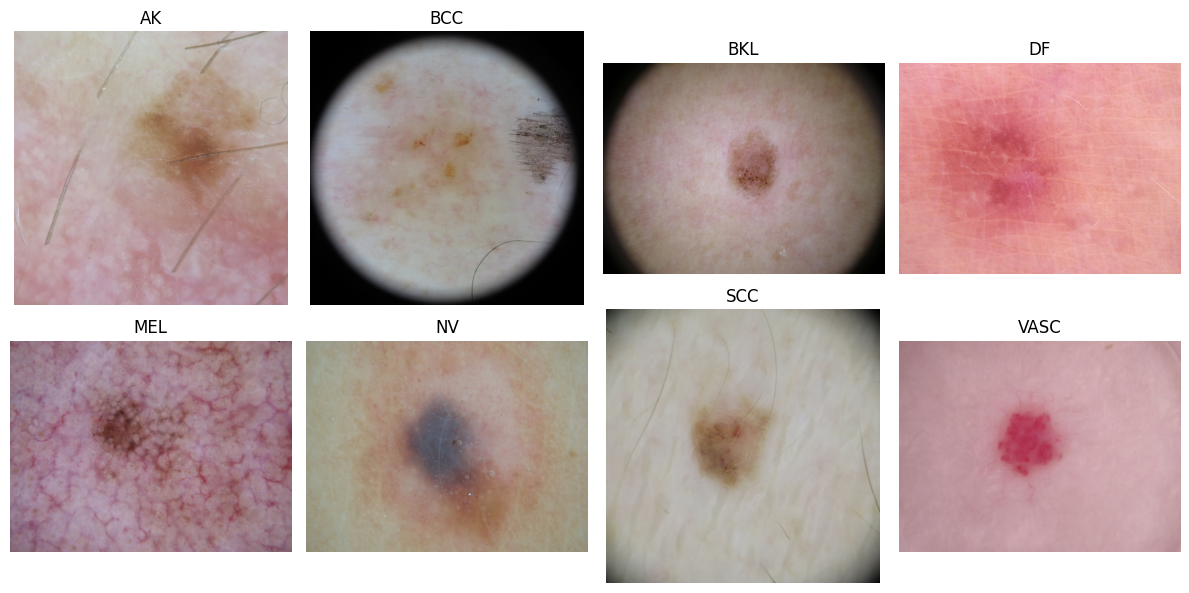

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

for ax, item in zip(axs.flat, random_imgs):
    
    image_path = f"./datasets/ISIC_2019_Training_Input/{item['image']}.jpg"
    img_data = Image.open(image_path)
    
    ax.imshow(img_data)
    ax.set_title(item['label'])
    ax.axis('off')

plt.tight_layout()
plt.show()

In [13]:
isic_train_dataset_metadata = pd.read_csv("./datasets/ISIC_2019_Training_Metadata.csv")
isic_full_dataset = pd.merge(left=isic_train_dataset, right=isic_train_dataset_metadata, on="image", how="left", validate="one_to_one")

In [14]:
isic_full_dataset.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,label,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV,55.0,anterior torso,NaN,female
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV,30.0,anterior torso,NaN,female
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL,60.0,upper extremity,NaN,female
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV,30.0,upper extremity,NaN,male
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL,80.0,posterior torso,NaN,male


In [15]:
isic_full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image                25331 non-null  object 
 1   MEL                  25331 non-null  float64
 2   NV                   25331 non-null  float64
 3   BCC                  25331 non-null  float64
 4   AK                   25331 non-null  float64
 5   BKL                  25331 non-null  float64
 6   DF                   25331 non-null  float64
 7   VASC                 25331 non-null  float64
 8   SCC                  25331 non-null  float64
 9   UNK                  25331 non-null  float64
 10  label                25331 non-null  object 
 11  age_approx           24894 non-null  float64
 12  anatom_site_general  22700 non-null  object 
 13  lesion_id            23247 non-null  object 
 14  sex                  24947 non-null  object 
dtypes: float64(10), object(5)
memory usa

In [16]:
isic_full_dataset.isna().sum()

image                     0
MEL                       0
NV                        0
BCC                       0
AK                        0
BKL                       0
DF                        0
VASC                      0
SCC                       0
UNK                       0
label                     0
age_approx              437
anatom_site_general    2631
lesion_id              2084
sex                     384
dtype: int64

In [17]:
isic_full_dataset['sex'].value_counts(dropna=False)

sex
male      13286
female    11661
NaN         384
Name: count, dtype: int64

<Axes: title={'center': 'Sex Distribution'}, xlabel='sex'>

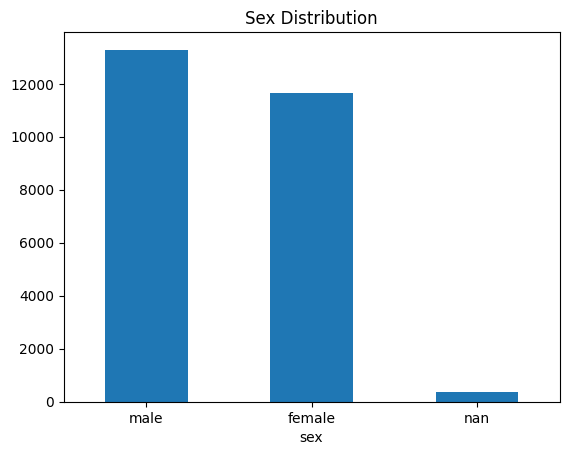

In [18]:
isic_full_dataset['sex'].value_counts(dropna=False).plot.bar(rot=0, title="Sex Distribution")

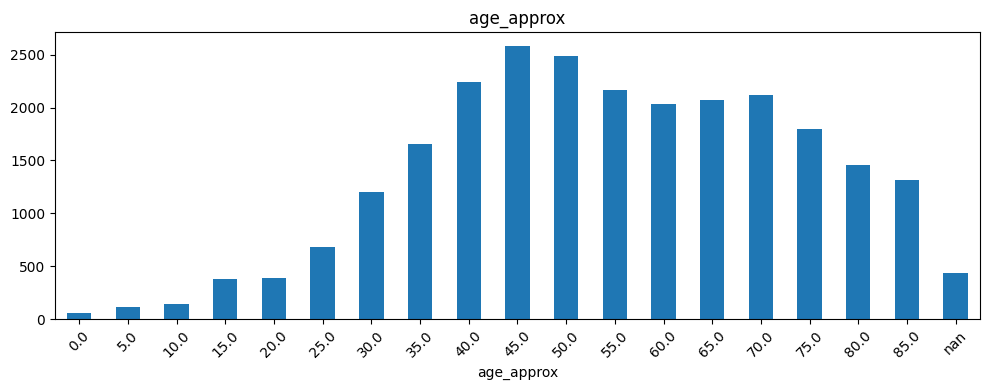

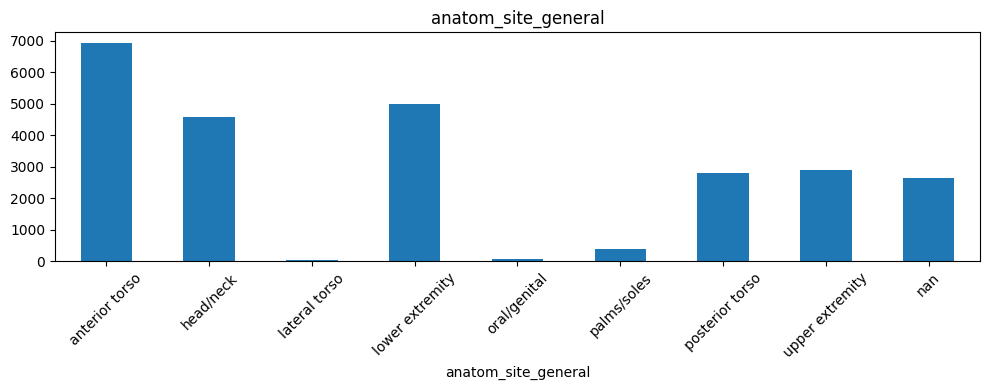

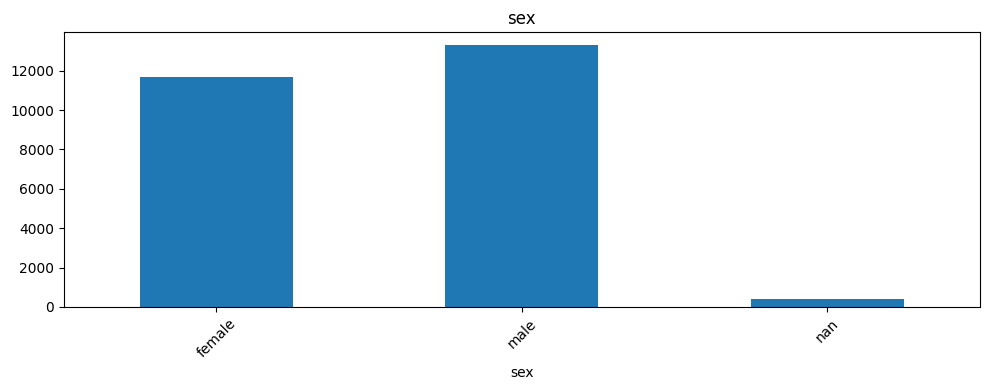

In [19]:
for row in isic_full_dataset.iloc[:, 11:].drop(columns=['lesion_id']):
    fig, ax = plt.subplots(figsize=(10, 4))
    isic_full_dataset[row].value_counts(dropna=False).sort_index().plot.bar(ax=ax, title=row)
    ax.tick_params(axis="x", rotation=45)
    plt.tight_layout()
    plt.show()

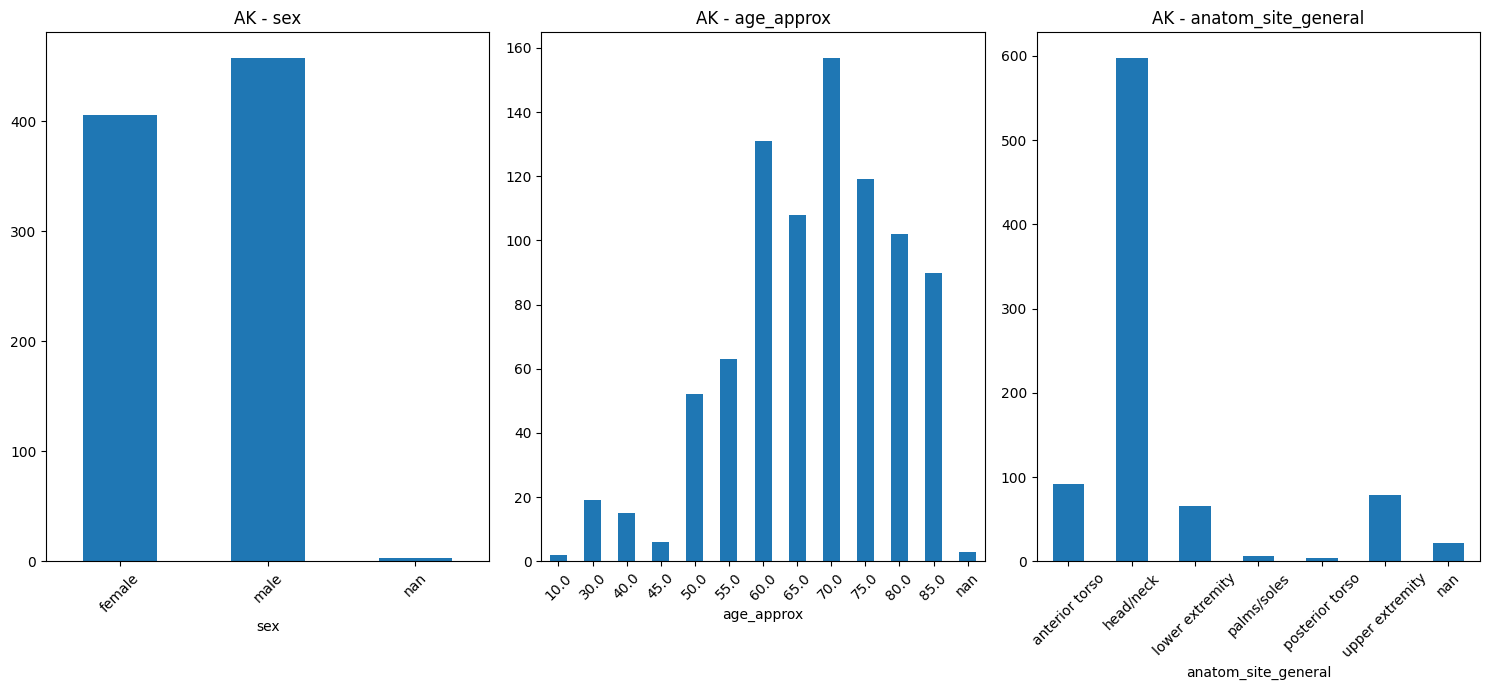

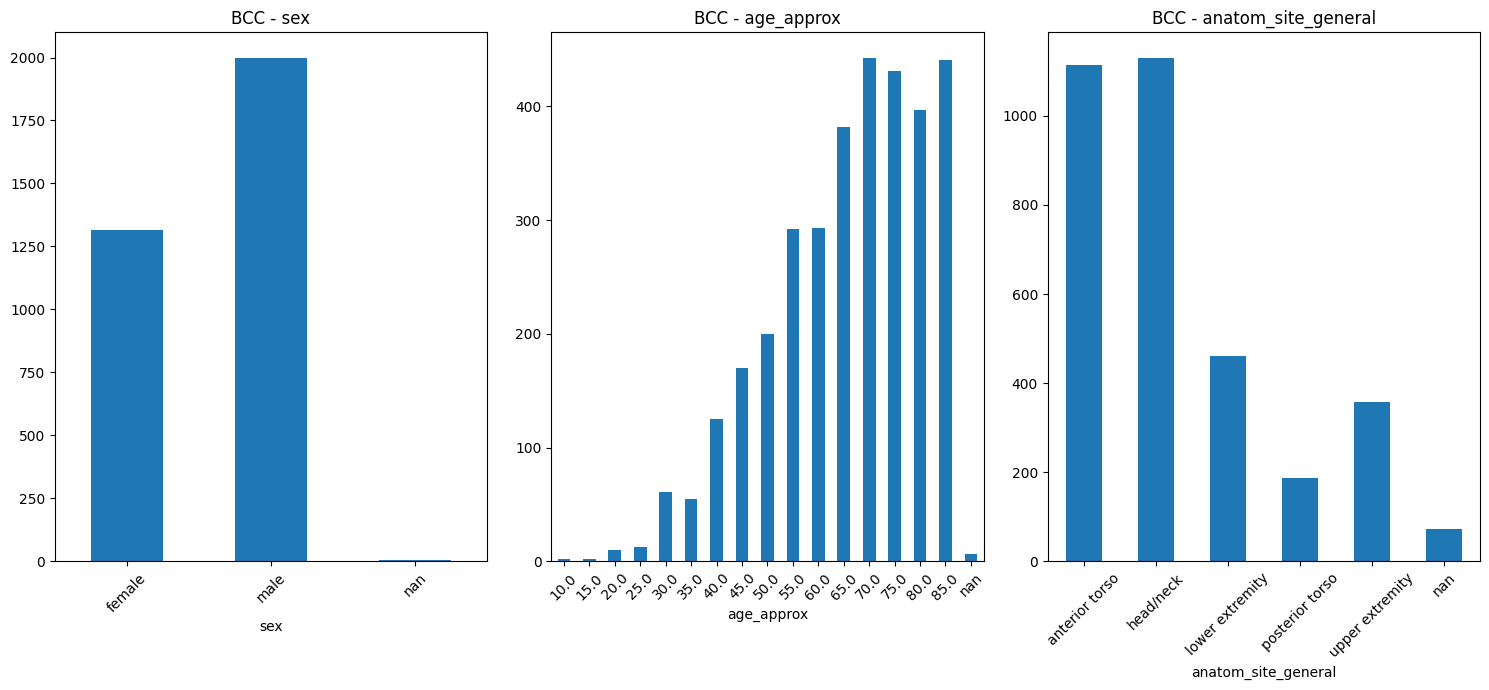

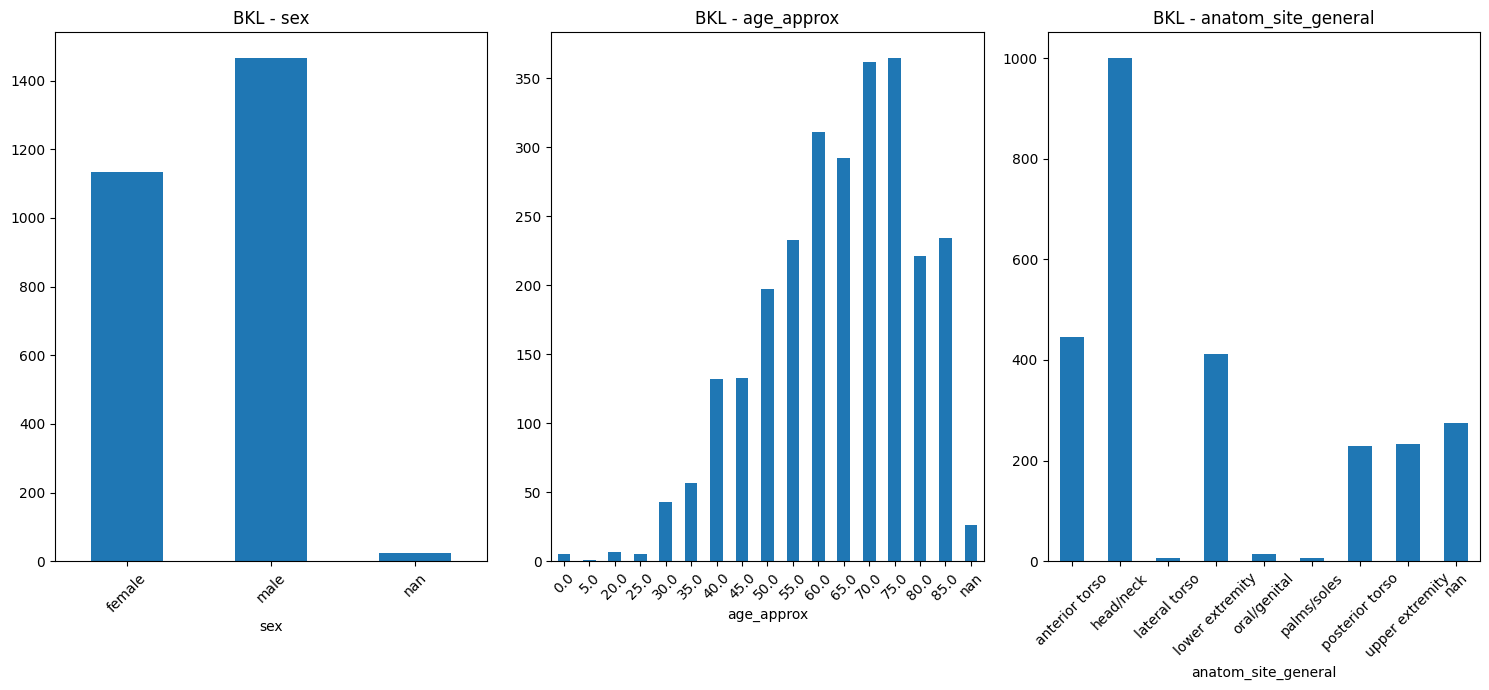

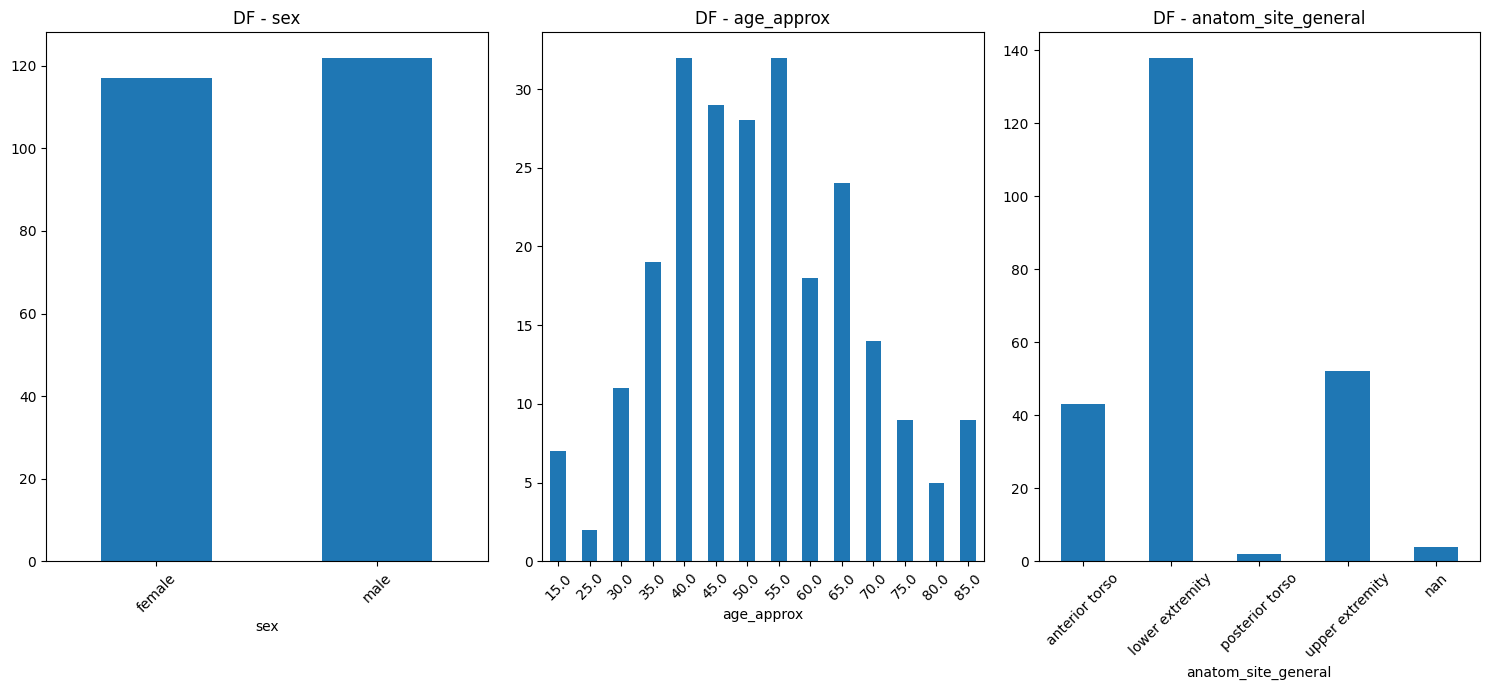

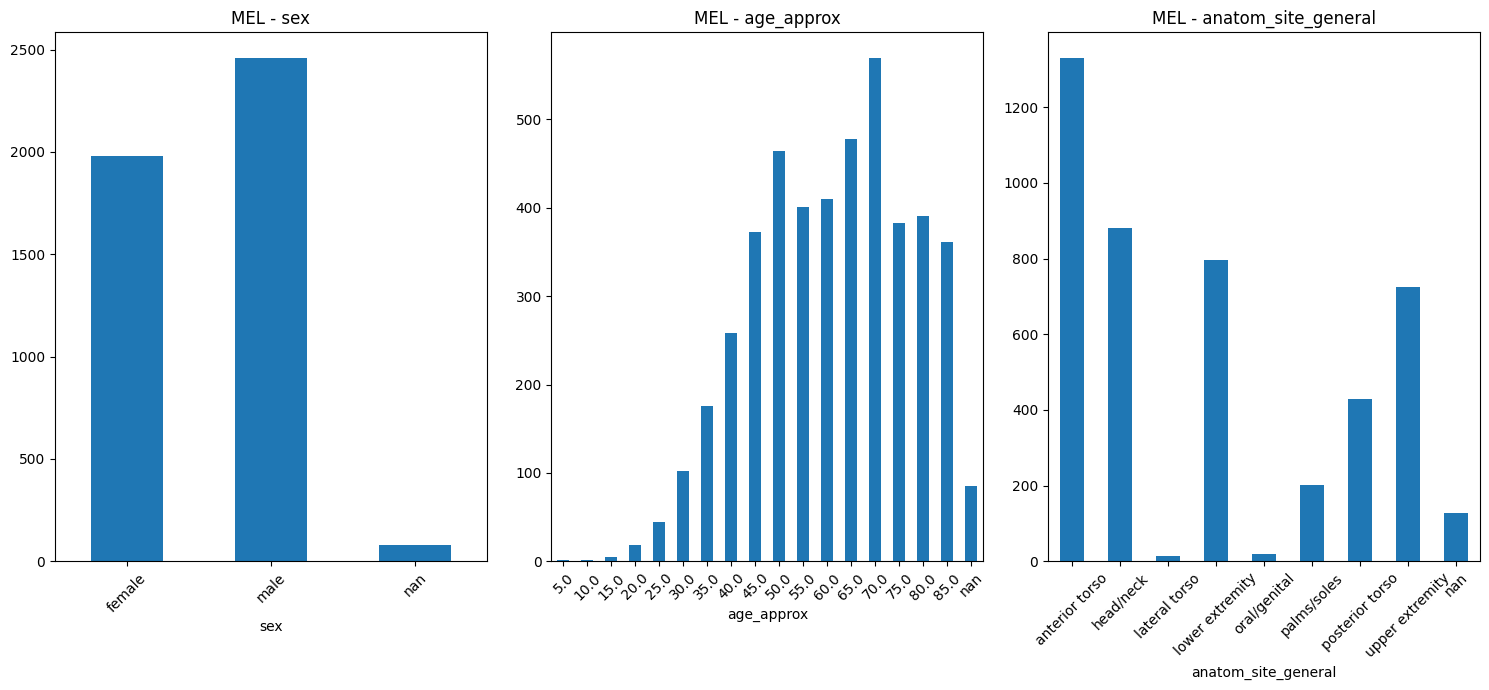

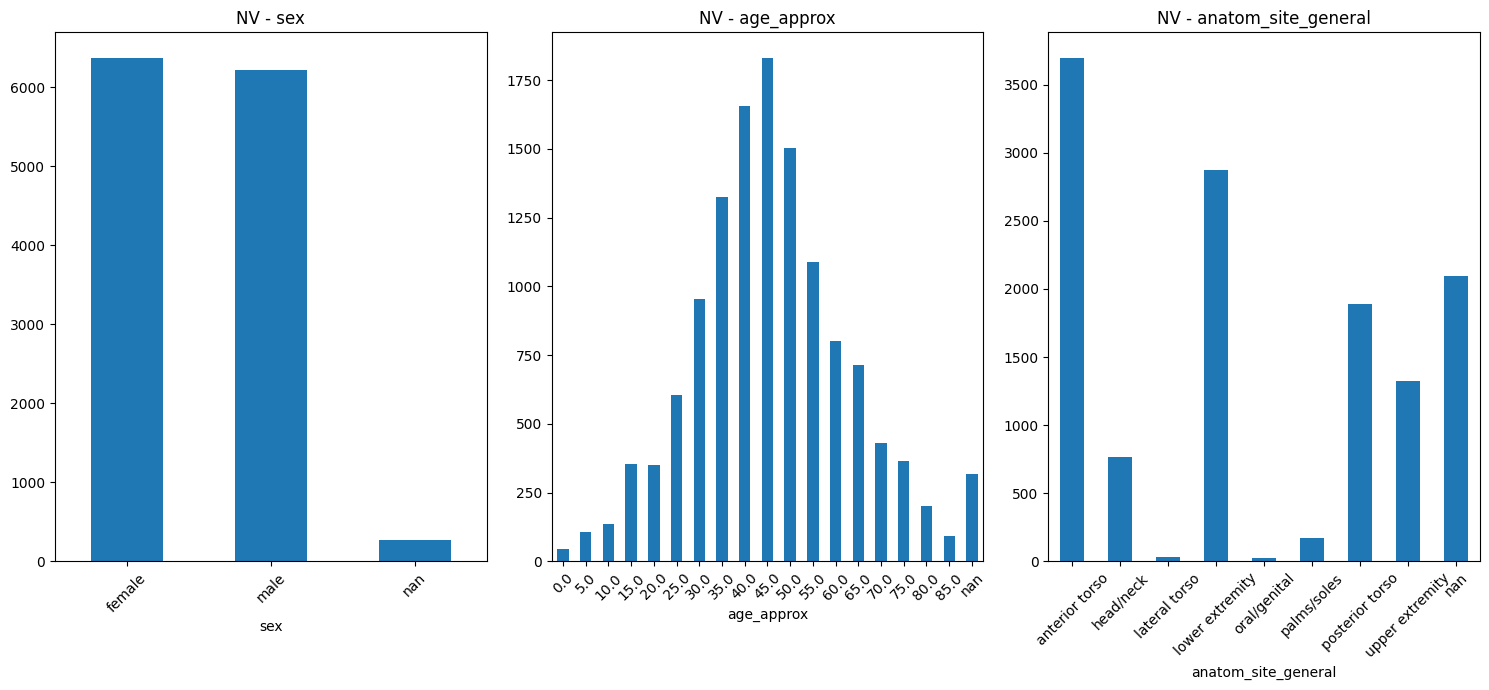

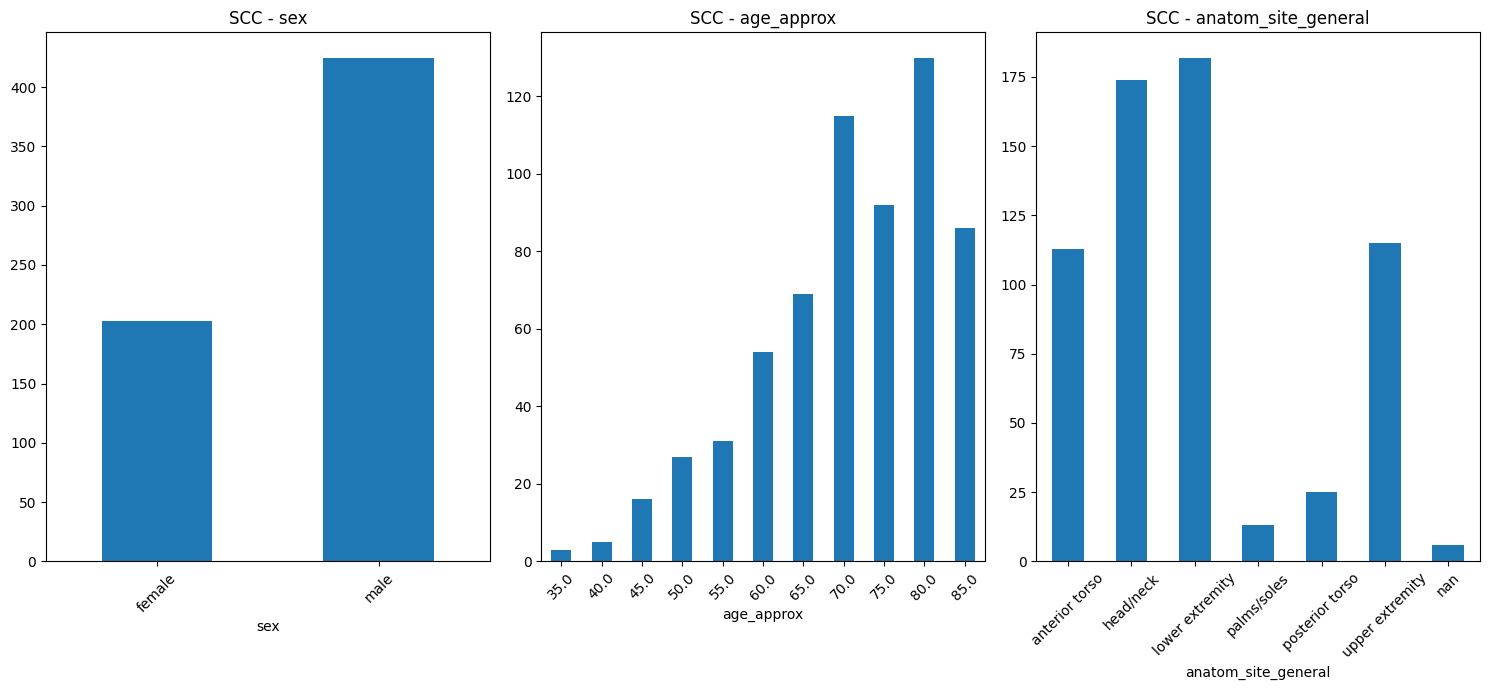

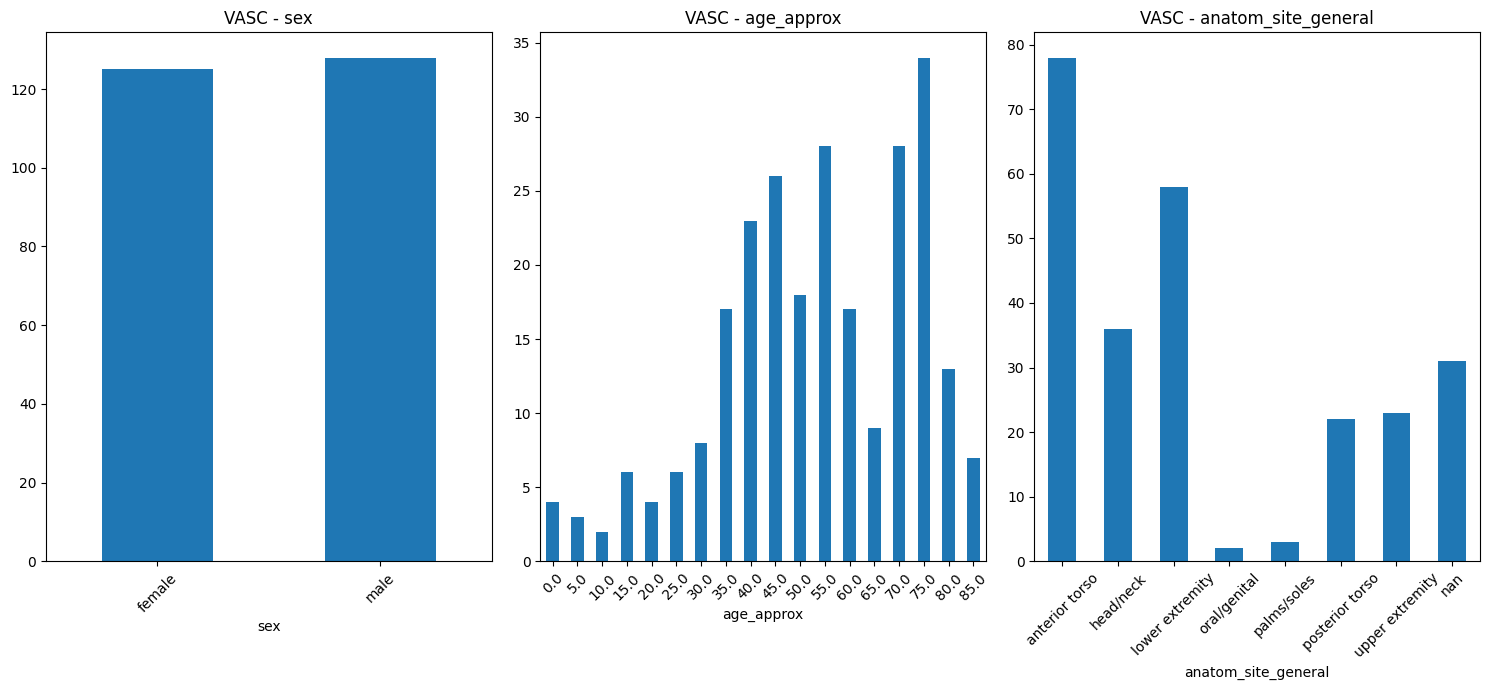

In [20]:
for name, group in isic_full_dataset.groupby(by='label'):
    fig, ax = plt.subplots(figsize=(15, 7), nrows=1, ncols=3)
    for col, axis in zip(['sex', 'age_approx', 'anatom_site_general'], ax.ravel()):
        group[col].value_counts(dropna=False).sort_index().plot.bar(ax=axis, title=f"{name} - {col}")
        axis.tick_params(axis="x", rotation=45)
    plt.tight_layout()
    plt.show()

In [40]:
sex_distribution_by_label = {"male": [], "female": [], "labels_order": []}
male_count, female_count = isic_full_dataset['sex'].value_counts()
for name, group in isic_full_dataset[['sex', 'label']].groupby(by='label'):
    m, f = group.value_counts()
    sex_distribution_by_label["labels_order"].append(name)
    sex_distribution_by_label["male"].append(round(((m / male_count) * 100), 2))
    sex_distribution_by_label["female"].append(round(((f / female_count) * 100), 2))

sex_distribution_by_label

{'male': [3.45, 15.05, 11.04, 0.92, 18.52, 48.01, 3.2, 0.96],
 'female': [3.48, 11.29, 9.72, 1.0, 16.98, 53.38, 1.74, 1.07],
 'labels_order': ['AK', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'SCC', 'VASC']}

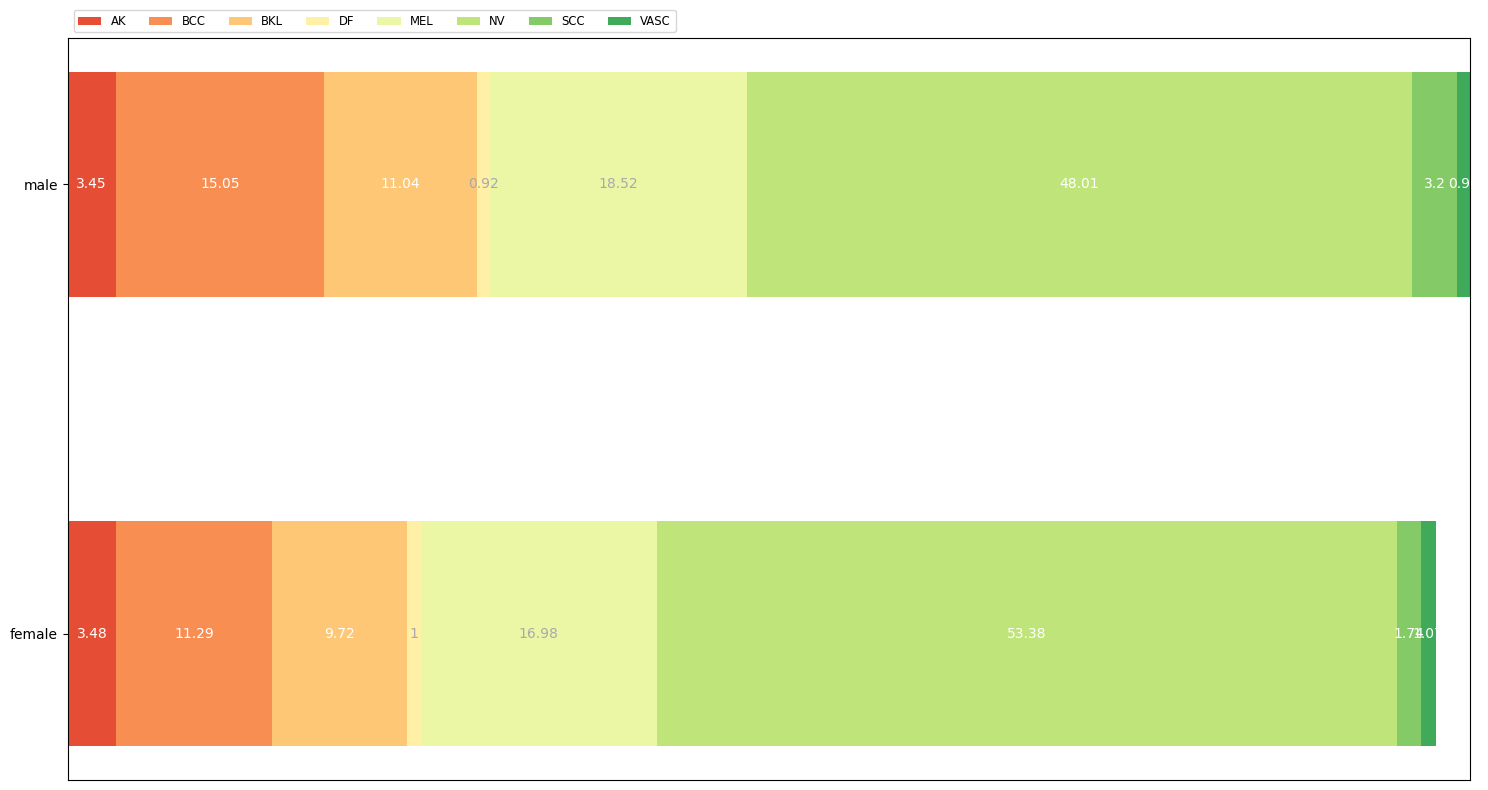

In [42]:
def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(15, 8))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey({'male': sex_distribution_by_label['male'], 'female': sex_distribution_by_label['female']}, sex_distribution_by_label['labels_order'])
plt.tight_layout()
plt.show()

In [54]:
isic_train_dataset['image'].duplicated().sum()

0

In [57]:
import seaborn as sns

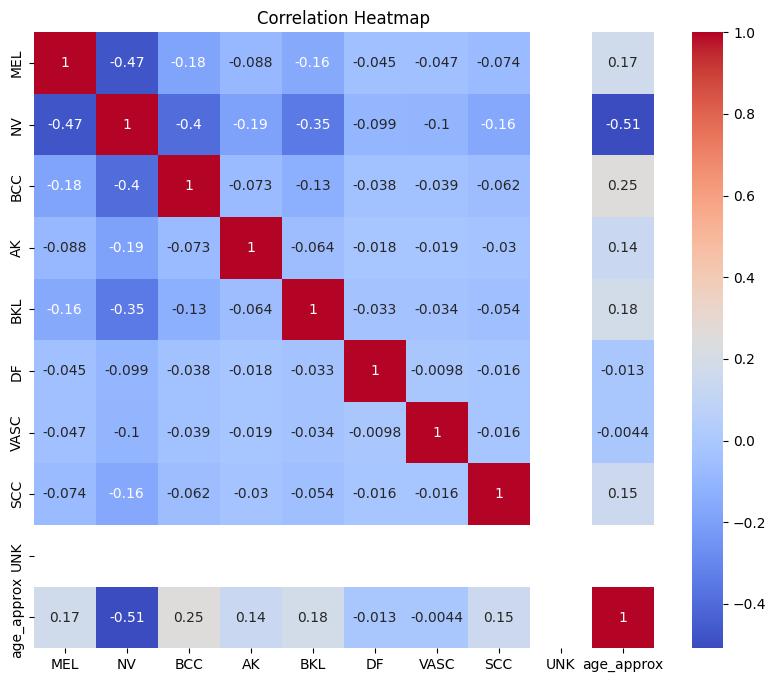

In [67]:
corr = isic_full_dataset.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

<Axes: >

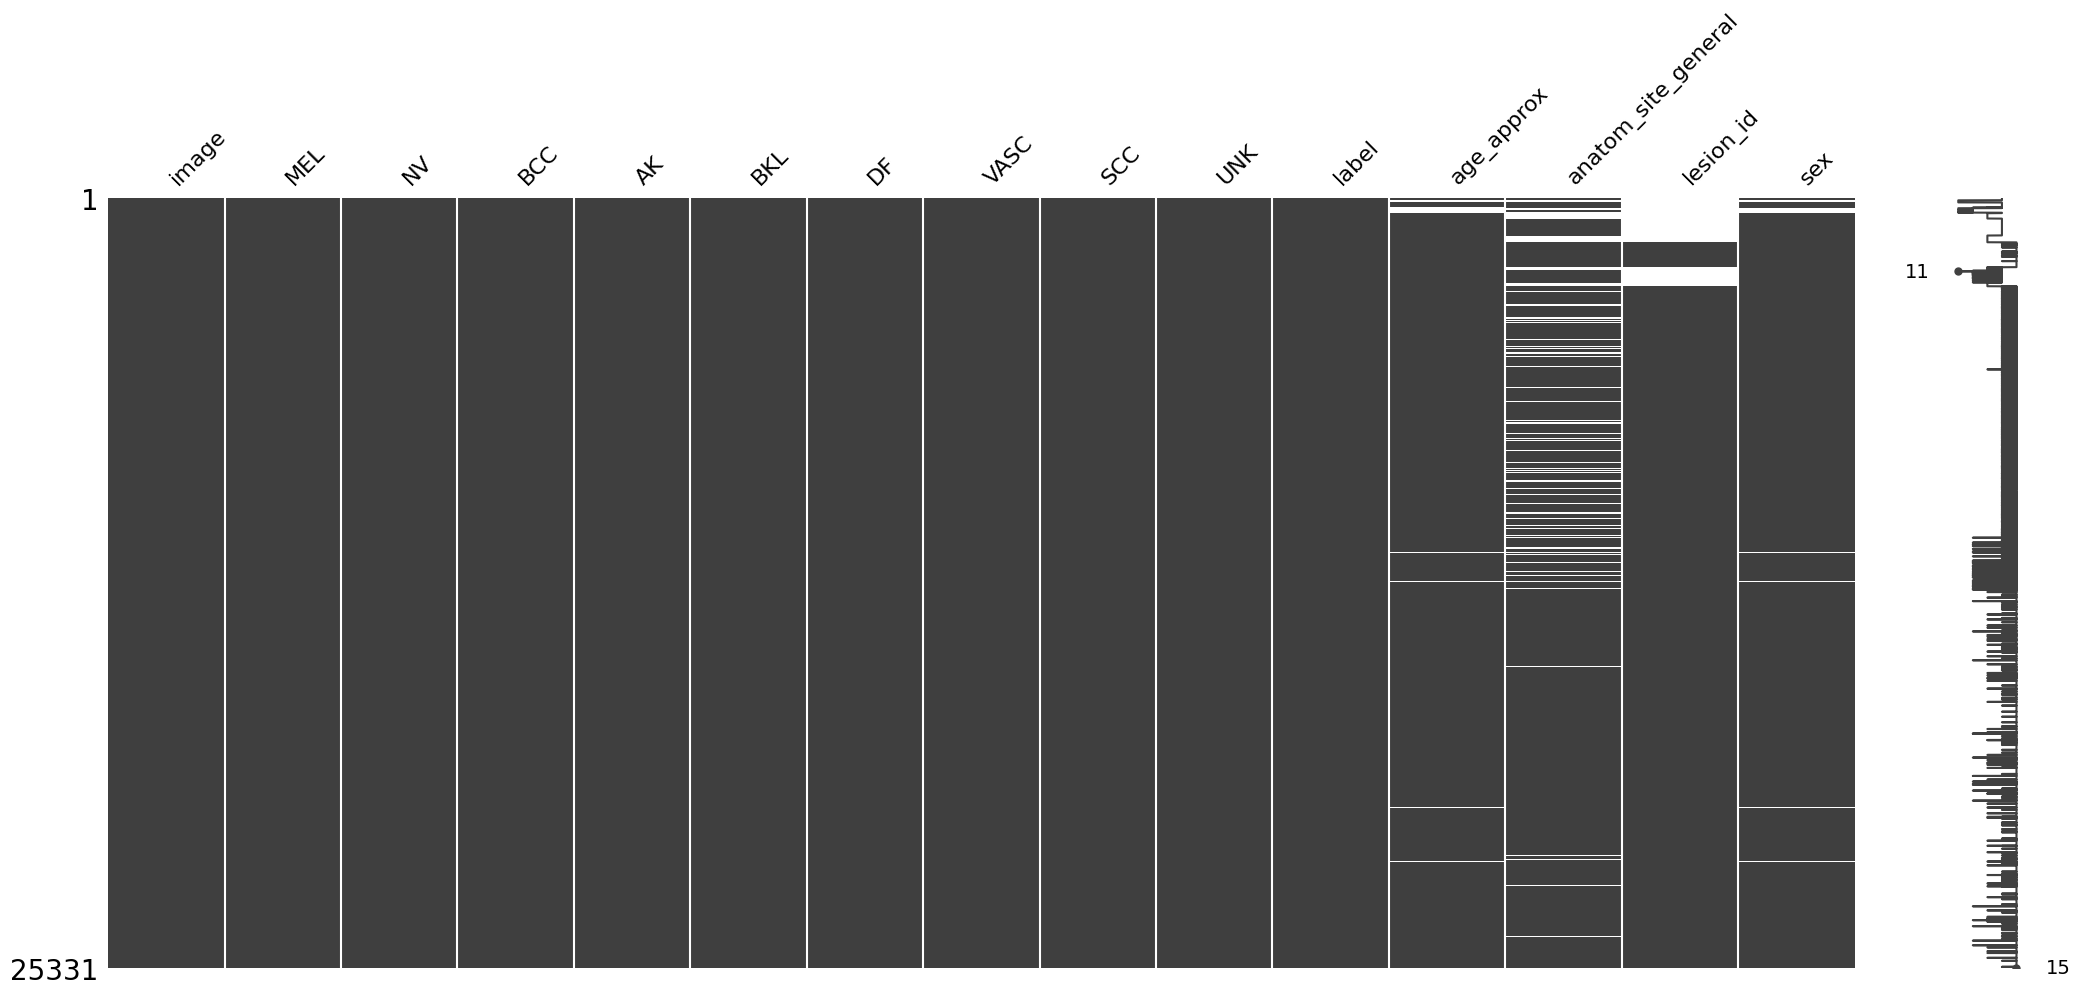

In [70]:
import missingno as msno
msno.matrix(isic_full_dataset)

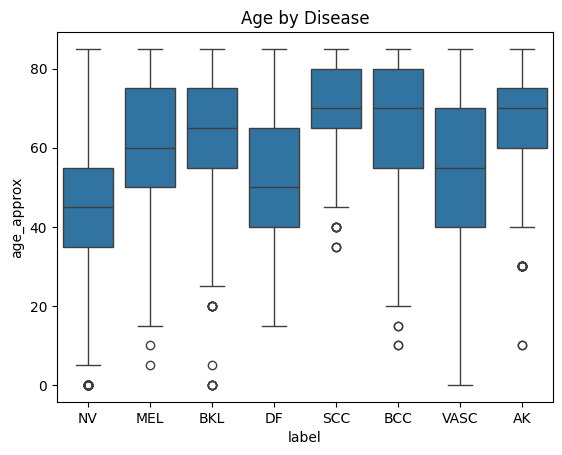

In [72]:
sns.boxplot(x='label', y='age_approx', data=isic_full_dataset)
plt.title("Age by Disease")
plt.show()

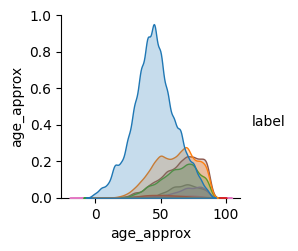

In [75]:
sns.pairplot(isic_full_dataset, hue='label', vars=['age_approx'])

In [78]:
class_counts = isic_full_dataset['label'].value_counts()
class_pct = class_counts / len(isic_full_dataset) * 100

display(pd.DataFrame({
    "count": class_counts,
    "percent": class_pct.round(2)
}))

,count,percent
label,,
NV,12875,50.83
MEL,4522,17.85
BCC,3323,13.12
BKL,2624,10.36
AK,867,3.42
SCC,628,2.48
VASC,253,1.00
DF,239,0.94


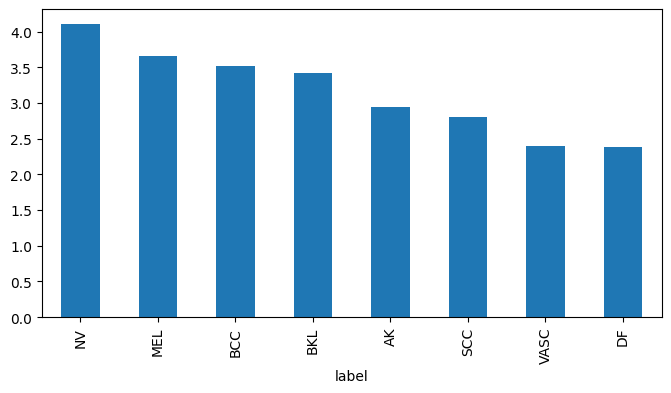

In [80]:
plt.figure(figsize=(8,4))
np.log10(class_counts).plot(kind='bar')
plt.show()

In [95]:
from scipy.stats import chi2_contingency

classes = isic_full_dataset['label'].unique()

for attr in ['sex', 'anatom_site_general']:
    print(f"\nAttr: {attr}")

    for c in classes:
        df = isic_full_dataset.copy().dropna()
        df['is_class'] = (df['label'] == c).astype(int)

        ct = pd.crosstab(df[attr], df['is_class'])
        chi2, p, dof, exp = chi2_contingency(ct.fillna(0))

        print(f"    {c}: chi2={chi2:.2f}, p={p:.2e}")


Attr: sex
    NV: chi2=124.07, p=8.13e-29
    MEL: chi2=3.31, p=6.89e-02
    BKL: chi2=4.34, p=3.73e-02
    DF: chi2=0.58, p=4.47e-01
    SCC: chi2=57.43, p=3.50e-14
    BCC: chi2=71.70, p=2.50e-17
    VASC: chi2=2.15, p=1.42e-01
    AK: chi2=0.18, p=6.72e-01

Attr: anatom_site_general
    NV: chi2=2310.59, p=0.00e+00
    MEL: chi2=350.69, p=8.78e-72
    BKL: chi2=785.15, p=2.97e-165
    DF: chi2=250.41, p=2.27e-50
    SCC: chi2=113.18, p=2.01e-21
    BCC: chi2=664.65, p=2.87e-139
    VASC: chi2=10.13, p=1.81e-01
    AK: chi2=1343.30, p=7.13e-286


In [107]:
from scipy.stats import chi2_contingency, fisher_exact
import numpy as np

classes = isic_full_dataset['label'].unique()

for attr in ['sex', 'anatom_site_general']:
    print(f"\nAttr: {attr}")

    for c in classes:
        if c == 'MEL':
            continue

        df = isic_full_dataset[isic_full_dataset['label'].isin(['MEL', c])].copy()

        df['is_c'] = (df['label'] == c).astype(int)

        ct = pd.crosstab(df[attr], df['is_c'])

        chi2, p, dof, exp = chi2_contingency(ct)

        print(f"    MEL vs {c}: chi2={chi2}, p={p:.3e}")


Attr: sex
    MEL vs NV: chi2=47.48161479966407, p=5.552e-12
    MEL vs BKL: chi2=0.6070822614663699, p=4.359e-01
    MEL vs DF: chi2=1.5786279677496045, p=2.090e-01
    MEL vs SCC: chi2=33.22849724740903, p=8.194e-09
    MEL vs BCC: chi2=18.30480078036161, p=1.882e-05
    MEL vs VASC: chi2=2.0599378379491236, p=1.512e-01
    MEL vs AK: chi2=1.596300243488244, p=2.064e-01

Attr: anatom_site_general
    MEL vs NV: chi2=873.43306477639, p=2.617e-184
    MEL vs BKL: chi2=492.606745474845, p=3.114e-102
    MEL vs DF: chi2=276.082181570673, p=7.688e-56
    MEL vs SCC: chi2=112.77572501911514, p=2.437e-21
    MEL vs BCC: chi2=432.22809566680826, p=2.904e-89
    MEL vs VASC: chi2=22.08825719503887, p=2.453e-03
    MEL vs AK: chi2=921.7500887117599, p=9.644e-195


In [109]:
ct = pd.crosstab(isic_full_dataset['label'], isic_full_dataset['anatom_site_general'])
chi2, p, dof, expected = chi2_contingency(ct)
residuals = (len(isic_full_dataset['anatom_site_general']) - expected) / np.sqrt(expected)

residuals

array([[ 1562.80584331,  1925.46293869, 17865.1046469 ,  1844.97395672,
        17091.22719233,  6577.2036868 ,  2476.77231318,  2423.42310654],
       [  773.46513719,   962.67755462,  9105.99246803,   920.82664965,
         8711.35836342,  3347.62567815,  1247.93105902,  1220.40962833],
       [  920.20128535,  1140.89103794, 10713.49227513,  1092.01604629,
        10249.27302246,  3940.71960667,  1474.62762498,  1442.39286798],
       [ 2985.42495671,  3669.03666256, 33878.55418243,  3517.17906876,
        32411.18087694, 12477.25783339,  4710.5096882 ,  4609.65087912],
       [  655.70265089,   820.20394485,  7830.86355812,   783.8760471 ,
         7491.41621666,  2876.875956  ,  1067.24984295,  1043.44775976],
       [  384.71002616,   496.03979311,  4996.88017667,   471.6560825 ,
         4780.0127284 ,  1828.69502001,   659.87140811,   644.20374998],
       [ 1826.47286655,  2248.25437173, 20823.21687149,  2154.61280157,
        19921.2390674 ,  7667.28349749,  2889.94998325,  2